## Analyses et figures (dans papier)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

data_path = '../input/data_global.xlsx'
data = pd.read_excel(data_path)

### Fried Score vs Frailty Score

Text(0, 0.5, 'Frailty_Score')

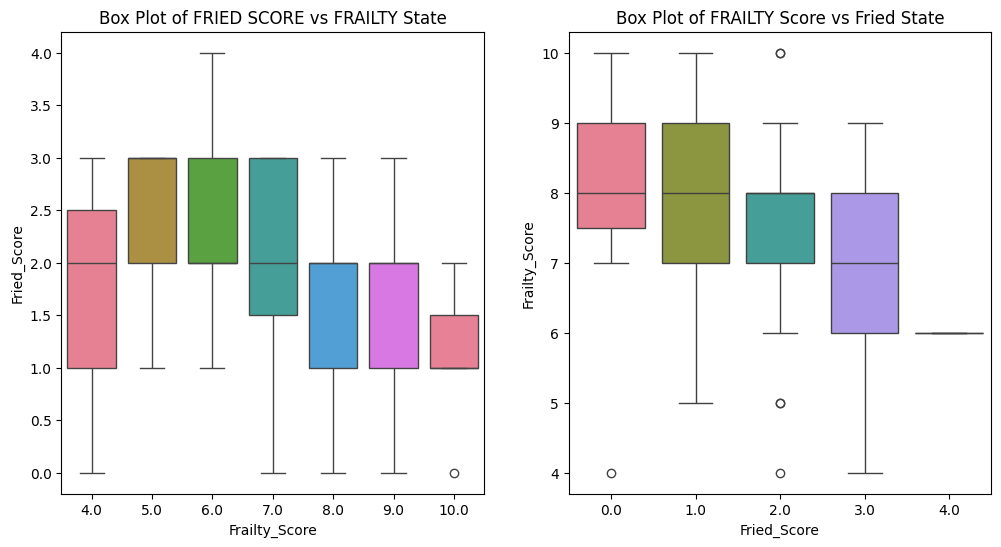

In [12]:
# Box plots for comparing the distribution of the target variables
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# subplot 1: FRAILTY SCORE vs Fried Score
sns.boxplot(y='Fried_Score_FRIED_TOTAL_Version_1', x='Frailty_Score_FRAGIRE18_SQ001', data=data, ax=ax1,
    palette='husl', hue='Frailty_Score_FRAGIRE18_SQ001', legend=False)
ax1.set_title('Box Plot of FRIED SCORE vs FRAILTY State')
ax1.set_xlabel('Frailty_Score')
ax1.set_ylabel('Fried_Score')

# subplot 2: Fried Score vs FRAILTY SCORE
sns.boxplot(x='Fried_Score_FRIED_TOTAL_Version_1', y='Frailty_Score_FRAGIRE18_SQ001', data=data, ax=ax2,
    palette='husl', hue='Fried_Score_FRIED_TOTAL_Version_1', legend=False)
ax2.set_title('Box Plot of FRAILTY Score vs Fried State')
ax2.set_xlabel('Fried_Score')
ax2.set_ylabel('Frailty_Score')

### Fied_Score vs Fragire18_State and Fragire_Score vs Fried_State

Text(0, 0.5, 'Frailty Score')

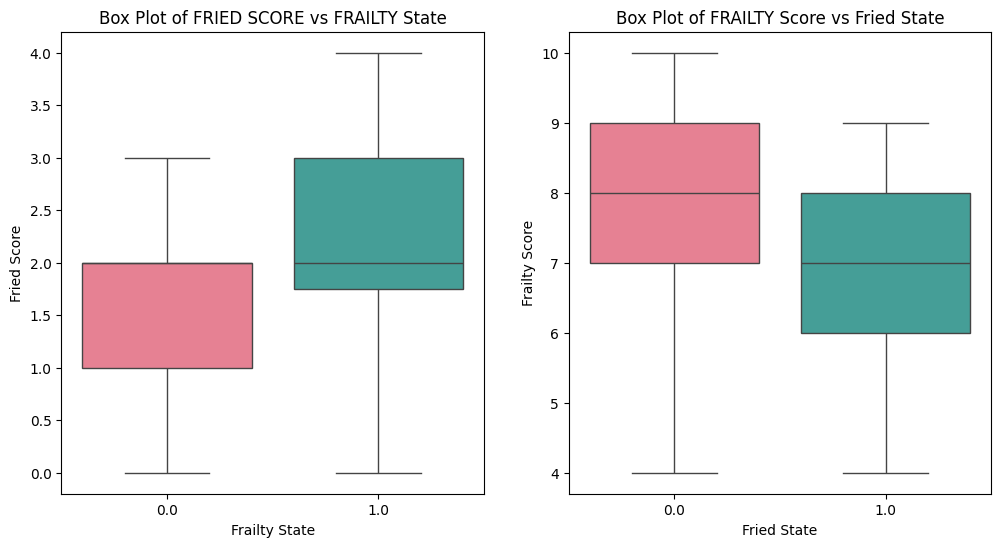

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# subplot 1: FRAILTY SCORE vs Fried Score
sns.boxplot(y='Fried_Score_FRIED_TOTAL_Version_1', x='Frailty_State_GFST', data=data, ax=ax1,
    palette='husl', hue='Frailty_State_GFST', legend=False)
ax1.set_title('Box Plot of FRIED SCORE vs FRAILTY State')
ax1.set_xlabel('Frailty State')
ax1.set_ylabel('Fried Score')

# subplot 2: FRAILTY SCORE vs Fried STATE
sns.boxplot(x='Fried_State', y='Frailty_Score_FRAGIRE18_SQ001', data=data, ax=ax2,
    palette='husl', hue='Fried_State', legend=False)
ax2.set_title('Box Plot of FRAILTY Score vs Fried State')
ax2.set_xlabel('Fried State')
ax2.set_ylabel('Frailty Score')

### Statokinesigram - Frail


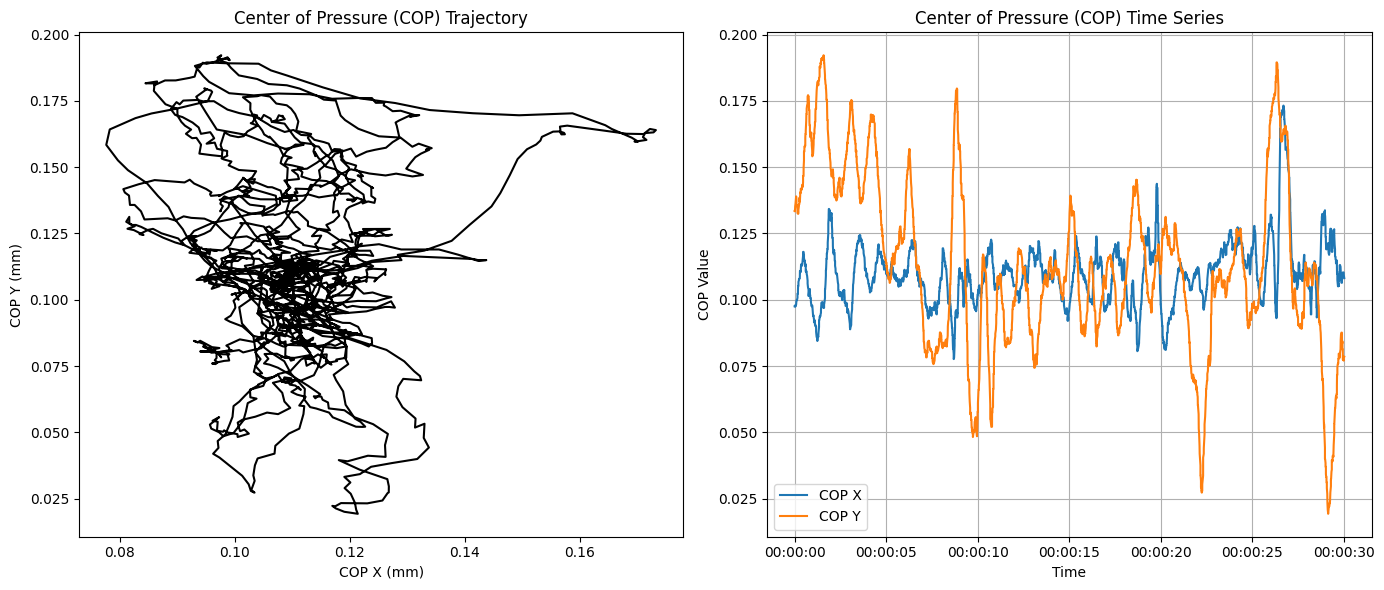

In [5]:
def load_data(foldername):
    base_path_posture = "P:/DATA_OCT_22/stade_2_Global_dataset/Donnees_t0/{}/t0/posture/"

    posture_data_files = {
        'yf_data': "2017-09-21_08_22_12_YF.txt",
        'yo_data': "2017-09-21_08_22_12_YO.txt"
    }

    data_forceplatform = {}
    for name, filename in posture_data_files.items():
        path = base_path_posture.format(foldername) + filename

        try :
            data_forceplatform[name] = pd.read_csv(path, sep="\t")
        except Exception as e:
            print("Error while loading data from", path)
            print("Exception :", e)
            
            return None
        
    return data_forceplatform

# Usage - load data
data_forceplatform = load_data('LEG033MML')

yf_data = data_forceplatform['yf_data']
yo_data = data_forceplatform['yo_data']

yf_data['TIMESTAMP'] = pd.to_datetime(yf_data['TIMESTAMP'], unit='s')
yo_data['TIMESTAMP'] = pd.to_datetime(yo_data['TIMESTAMP'], unit='s')

# =========================================================================

# Assuming force plate dimensions
length = 1  # replace with actual length
width = 1  # replace with actual width

# Calculate total force
yf_data['TotalForce'] = yf_data['BottomLeftCalcul_SensorsKG'] + yf_data['BottomRightCalcul_SensorsKG'] + yf_data['TopLeftCalcul_SensorsKG'] + yf_data['TopRightCalcul_SensorsKG']

# Calculate COP_X and COP_Y
yf_data['COP_X'] = ((yf_data['BottomLeftCalcul_SensorsKG'] + yf_data['TopLeftCalcul_SensorsKG']) * width / 2 - 
                (yf_data['BottomRightCalcul_SensorsKG'] + yf_data['TopRightCalcul_SensorsKG']) * width / 2) /yf_data['TotalForce']

yf_data['COP_Y'] = ((yf_data['BottomLeftCalcul_SensorsKG'] + yf_data['BottomRightCalcul_SensorsKG']) * length / 2 - 
                (yf_data['TopLeftCalcul_SensorsKG'] + yf_data['TopRightCalcul_SensorsKG']) * length / 2) / yf_data['TotalForce']


# Create the combined plot
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Left: COP trajectory
axs[0].plot(yf_data['COP_X'], yf_data['COP_Y'], color='k')
axs[0].set_title('Center of Pressure (COP) Trajectory')
axs[0].set_xlabel('COP X (mm)')
axs[0].set_ylabel('COP Y (mm)')
axs[0].grid(False)

# Right: Time series of COP_X and COP_Y
axs[1].plot(yf_data['TIMESTAMP'], yf_data['COP_X'], label='COP X')
axs[1].plot(yf_data['TIMESTAMP'], yf_data['COP_Y'], label='COP Y')
axs[1].set_title('Center of Pressure (COP) Time Series')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('COP Value')
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()

#========================================================================

### Statokinesigram - Healthy

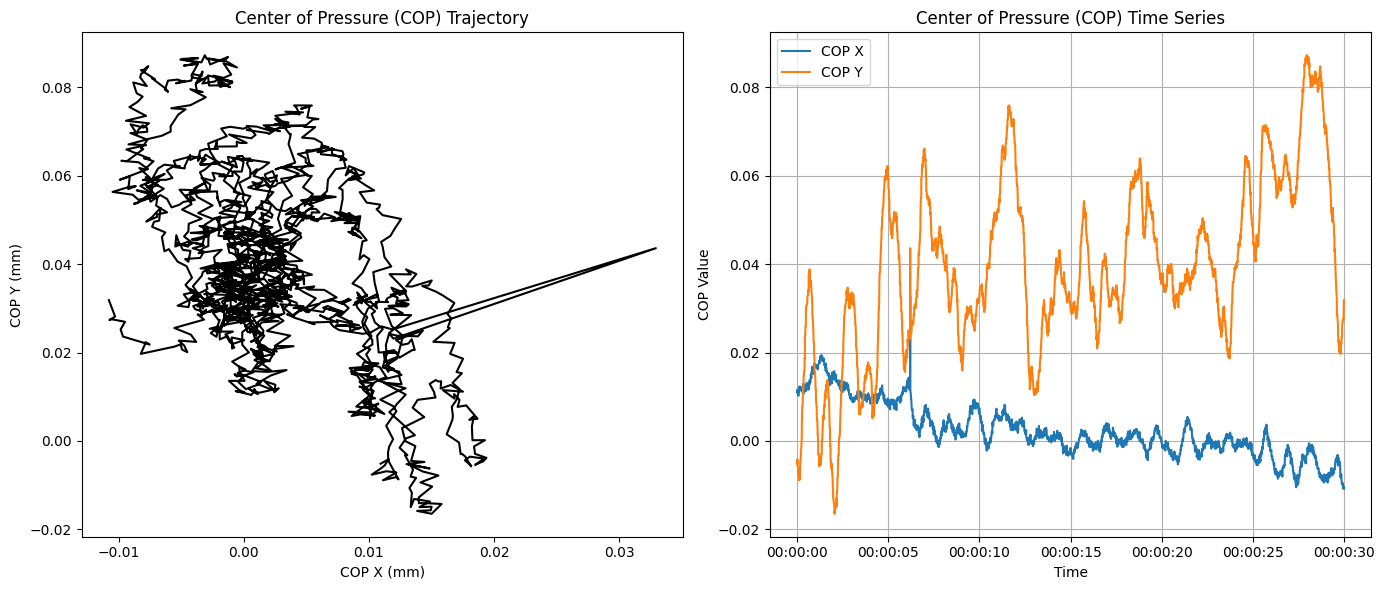

In [6]:
def load_data(foldername):
    base_path_posture = "P:/DATA_OCT_22/stade_2_Global_dataset/Donnees_t0/{}/t0/posture/"

    posture_data_files = {
        'yf_data': "2017-09-21_08_22_12_YF.txt",
        'yo_data': "2017-09-21_08_22_12_YO.txt"
    }

    data_forceplatform = {}
    for name, filename in posture_data_files.items():
        path = base_path_posture.format(foldername) + filename

        try :
            data_forceplatform[name] = pd.read_csv(path, sep="\t")
        except Exception as e:
            print("Error while loading data from", path)
            print("Exception :", e)
            
            return None
        
    return data_forceplatform

# Usage - load data
data_forceplatform = load_data('LEG028DJO')

yf_data = data_forceplatform['yf_data']
yo_data = data_forceplatform['yo_data']

yf_data['TIMESTAMP'] = pd.to_datetime(yf_data['TIMESTAMP'], unit='s')
yo_data['TIMESTAMP'] = pd.to_datetime(yo_data['TIMESTAMP'], unit='s')

# =========================================================================

# Assuming force plate dimensions
length = 1  # replace with actual length
width = 1  # replace with actual width

# Calculate total force
yf_data['TotalForce'] = yf_data['BottomLeftCalcul_SensorsKG'] + yf_data['BottomRightCalcul_SensorsKG'] + yf_data['TopLeftCalcul_SensorsKG'] + yf_data['TopRightCalcul_SensorsKG']

# Calculate COP_X and COP_Y
yf_data['COP_X'] = ((yf_data['BottomLeftCalcul_SensorsKG'] + yf_data['TopLeftCalcul_SensorsKG']) * width / 2 - 
                (yf_data['BottomRightCalcul_SensorsKG'] + yf_data['TopRightCalcul_SensorsKG']) * width / 2) /yf_data['TotalForce']

yf_data['COP_Y'] = ((yf_data['BottomLeftCalcul_SensorsKG'] + yf_data['BottomRightCalcul_SensorsKG']) * length / 2 - 
                (yf_data['TopLeftCalcul_SensorsKG'] + yf_data['TopRightCalcul_SensorsKG']) * length / 2) / yf_data['TotalForce']


# Create the combined plot
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Left: COP trajectory
axs[0].plot(yf_data['COP_X'], yf_data['COP_Y'], color='k')
axs[0].set_title('Center of Pressure (COP) Trajectory')
axs[0].set_xlabel('COP X (mm)')
axs[0].set_ylabel('COP Y (mm)')
axs[0].grid(False)

# Right: Time series of COP_X and COP_Y
axs[1].plot(yf_data['TIMESTAMP'], yf_data['COP_X'], label='COP X')
axs[1].plot(yf_data['TIMESTAMP'], yf_data['COP_Y'], label='COP Y')
axs[1].set_title('Center of Pressure (COP) Time Series')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('COP Value')
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()


### GAIT - HEALTHY

In [19]:

def load_gait_data(foldername):
    """
    Load gait data from a specified folder.
    
    Parameters:
        foldername (str): The folder containing the gait data files (e.g., 'LEG028DJO').
    
    Returns:
        dict: A dictionary containing dataframes for each IMU ('ce_data', 'pd_data', 'pg_data', 'te_data').
              If a file is missing, the corresponding key will not be included.
    """
    base_path_gait = f"P:/DATA_OCT_22/stade_2_Global_dataset/Donnees_t0/{foldername}/t0/gait/"
    
    gait_data_files = {
        'ce_data': "ACQ_CE.txt",
        'pd_data': "ACQ_PD.txt",
        'pg_data': "ACQ_PG.txt",
        'te_data': "ACQ_TE.txt"
    }

    data_gait = {}
    
    try:
        for name, filename in gait_data_files.items():
            path = os.path.join(base_path_gait, filename)
            
            if os.path.exists(path):
                # Load the data into a DataFrame
                data_gait[name] = pd.read_csv(path, sep="\t", skiprows=4)
                print(f"Loaded {filename} successfully.")
            else:
                print(f"File not found: {filename}")
        
        if not data_gait:
            print("No gait data files could be loaded.")
        return data_gait
    
    except Exception as e:
        print("An error occurred while loading gait data.")
        print(f"Error: {e}")
        return None

# Example usage
foldername = 'LEG028DJO'
data_gait = load_gait_data(foldername)

if data_gait:
    for key, df in data_gait.items():
        print(f"{key}: {df.shape} rows and columns loaded.")


Loaded ACQ_CE.txt successfully.
Loaded ACQ_PD.txt successfully.
Loaded ACQ_PG.txt successfully.
Loaded ACQ_TE.txt successfully.
ce_data: (2581, 33) rows and columns loaded.
pd_data: (2581, 33) rows and columns loaded.
pg_data: (2581, 33) rows and columns loaded.
te_data: (2581, 33) rows and columns loaded.


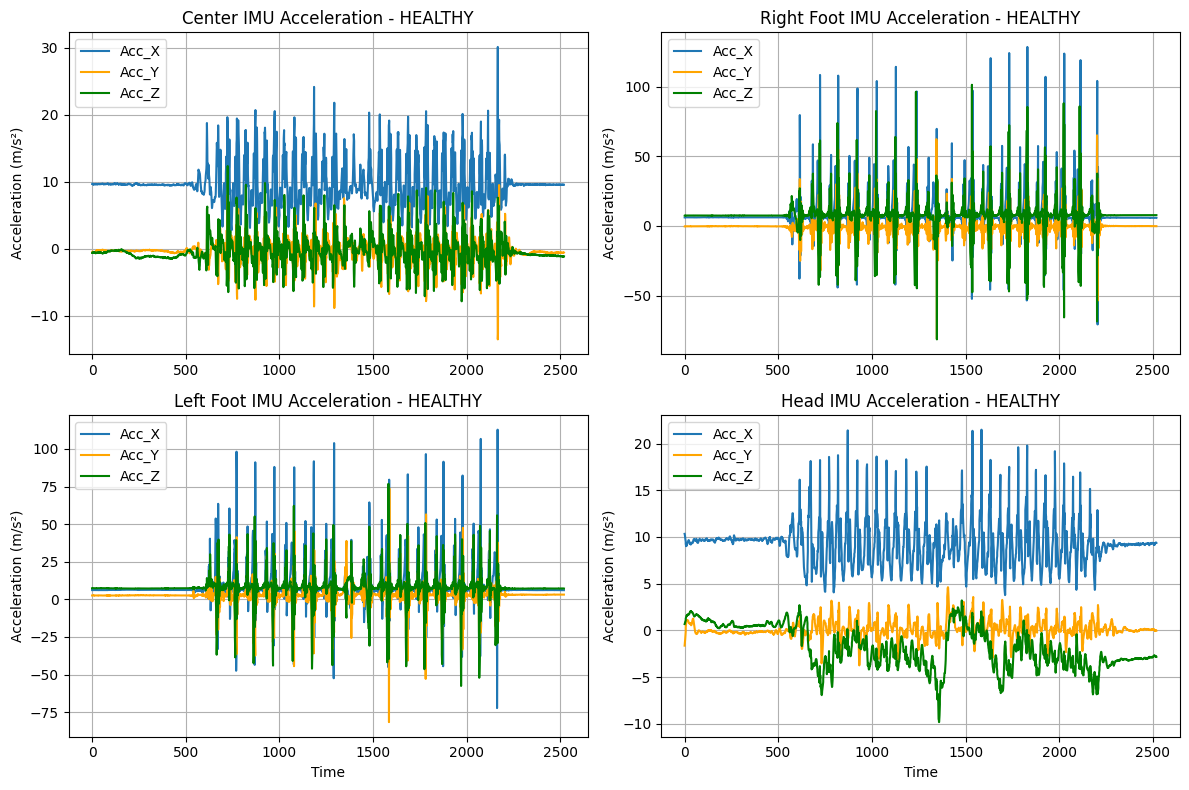

In [34]:
def plot_gait_data(data_gait):
    """
    Plot acceleration data for all IMUs from the gait dataset.
    
    Parameters:
        data_gait (dict): Dictionary containing DataFrames for each IMU ('ce_data', 'pd_data', 'pg_data', 'te_data').
    """
    imu_names = {
        'ce_data': 'Center',
        'pd_data': 'Right Foot',
        'pg_data': 'Left Foot',
        'te_data': 'Head'
    }

    fig, axs = plt.subplots(2, 2, figsize=(12, 8))
    axs = axs.flatten()

    for i, (name, df) in enumerate(data_gait.items()):
        # df.drop_duplicates('Time_Of_Arrival', keep='last')
        time = (df['Time_Of_Arrival'] - df['Time_Of_Arrival'].iloc[0])
        acc_x = df['Acc_X']
        acc_y = df['Acc_Y']
        acc_z = df['Acc_Z']
        
        # Plot acceleration
        axs[i].plot(time, acc_x, label='Acc_X')
        axs[i].plot(time, acc_y, label='Acc_Y', color='orange')
        axs[i].plot(time, acc_z, label='Acc_Z', color='green')
        axs[i].set_title(f'{imu_names[name]} IMU Acceleration - HEALTHY')
        axs[i].set_ylabel('Acceleration (m/s²)')
        axs[i].legend()
        axs[i].grid()

    axs[2].set_xlabel('Time')
    axs[3].set_xlabel('Time')
    plt.tight_layout()
    plt.show()
    
plot_gait_data(data_gait)



### GAIT - FRAIL

In [4]:
# Example usage
foldername_F = 'LEG037MMN'
data_gait_F = load_gait_data(foldername_F)

if data_gait_F:
    for key_F, df_F in data_gait_F.items():
        print(f"{key_F}: {df_F.shape} rows and columns loaded.")

Loaded ACQ_CE.txt successfully.
Loaded ACQ_PD.txt successfully.
Loaded ACQ_PG.txt successfully.
Loaded ACQ_TE.txt successfully.
ce_data: (3364, 33) rows and columns loaded.
pd_data: (3364, 33) rows and columns loaded.
pg_data: (3364, 33) rows and columns loaded.
te_data: (3364, 33) rows and columns loaded.


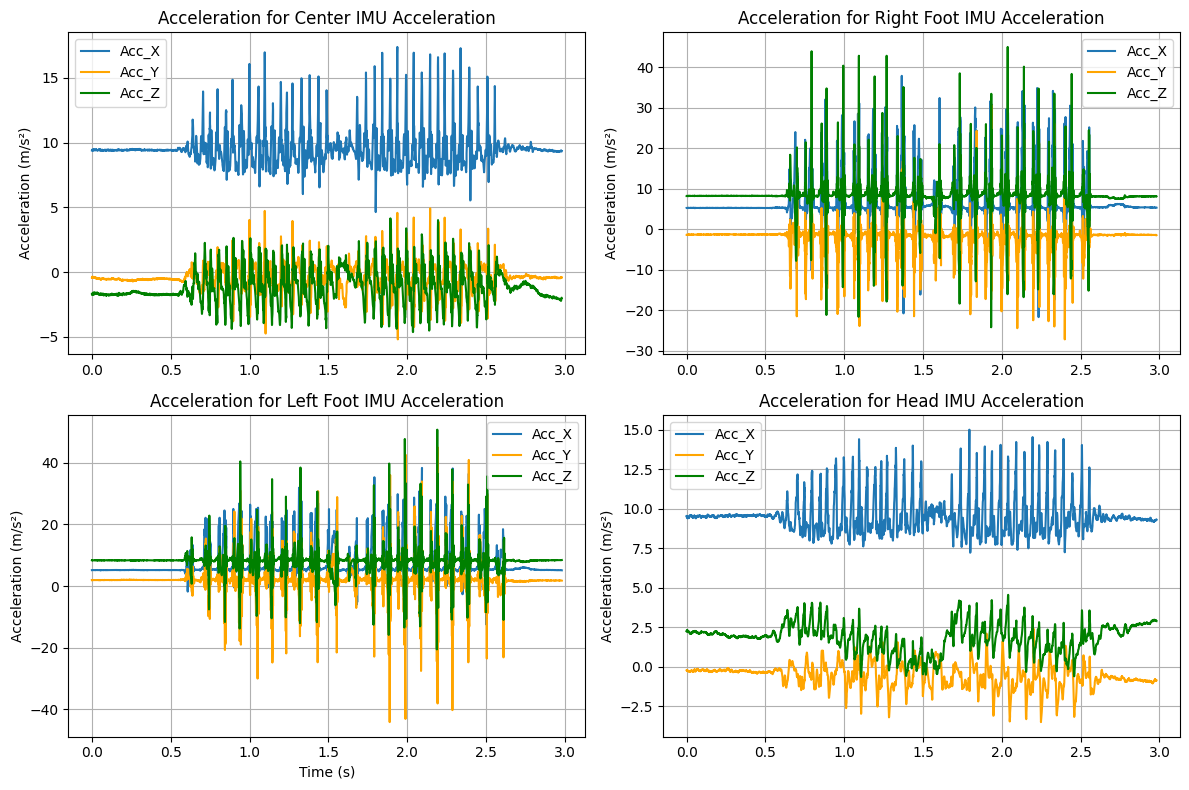

In [7]:
# Plot the gait data- Frail
plot_gait_data(data_gait_F)

